In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from google.colab import files
uploaded = files.upload()



Saving crude-oil-price.csv to crude-oil-price.csv


In [4]:
df = pd.read_csv('/content/crude-oil-price.csv')
print(df.head(10))

                        date  price  percentChange  change
0  1983-03-01 00:00:00+00:00  29.27            NaN     NaN
1  1983-04-01 00:00:00+00:00  30.63          4.646    1.36
2  1983-05-01 00:00:00+00:00  30.25         -1.241   -0.38
3  1983-06-01 00:00:00+00:00  31.38          3.736    1.13
4  1983-07-01 00:00:00+00:00  32.00          1.976    0.62
5  1983-08-01 00:00:00+00:00  31.59         -1.281   -0.41
6  1983-09-01 00:00:00+00:00  30.36         -3.894   -1.23
7  1983-10-01 00:00:00+00:00  30.37          0.033    0.01
8  1983-11-01 00:00:00+00:00  29.23         -3.754   -1.14
9  1983-12-01 00:00:00+00:00  29.60          1.266    0.37


checking for the null value


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           509 non-null    object 
 1   price          509 non-null    float64
 2   percentChange  508 non-null    float64
 3   change         508 non-null    float64
dtypes: float64(3), object(1)
memory usage: 16.0+ KB


,0
date,0
price,0
percentChange,1
change,1


In [6]:
import numpy as np

# Add a fake target column for demonstration (random 0 or 1)
df['readmitted_binary'] = np.random.randint(0, 2, size=len(df))


In [7]:
# Convert readmitted column into binary: 1 if readmitted (<30 or >30), else 0
# This code is not needed as 'readmitted_binary' column is already created in the previous cell
# df['readmitted_binary'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

In [10]:
selected_features = [
    'date', 'price', 'percentChange', 'change'
]

df = df[selected_features + ['readmitted_binary']]

In [12]:
# Convert 'date' to datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Fill missing numerical values with the mean
for col in ['percentChange', 'change']:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Ensure column is numeric
    df[col].fillna(df[col].mean(), inplace=True)


# Encode the 'date' column (now datetime) - Label Encoding might not be the best for dates, consider other approaches if needed
# For this example, I'll convert it to numerical representation (e.g., Unix timestamp or ordinal)
df['date'] = df['date'].apply(lambda x: x.toordinal() if pd.notnull(x) else 0)


# The other columns are now numerical, so no need to encode them with LabelEncoder
# cat_cols = df.select_dtypes(include=['object']).columns
# le = LabelEncoder()
# for col in cat_cols:
#     df[col] = le.fit_transform(df[col])

/tmp/ipython-input-12-1840029034.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Split into training and testing data:

In [13]:
X = df.drop('readmitted_binary', axis=1)
y = df['readmitted_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Accuracy: 0.46078431372549017
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.61      0.50        46
           1       0.51      0.34      0.41        56

    accuracy                           0.46       102
   macro avg       0.47      0.47      0.46       102
weighted avg       0.48      0.46      0.45       102



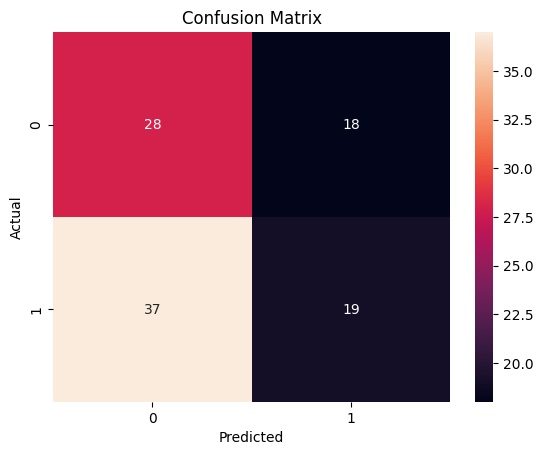

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict on test data
y_pred = model.predict(X_test)   # ✅ This line must come first!

# Step 2: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 3: Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

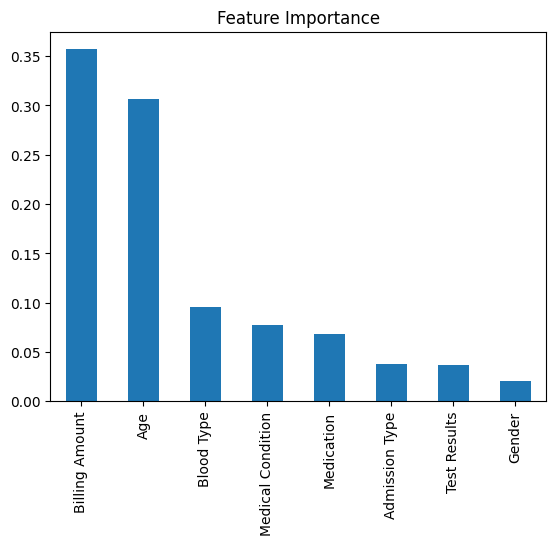

In [ ]:
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [18]:
# Assume model and X_test are already defined from training
# Pick a few test examples (like 5 patients)
sample_patients = X_test.iloc[:5]

# Predict using the model
sample_predictions = model.predict(sample_patients)

# Show predictions
for i, prediction in enumerate(sample_predictions):
    print(f"Patient {i+1}: {'Readmitted' if prediction == 1 else 'Not Readmitted'}")

Patient 1: Not Readmitted
Patient 2: Not Readmitted
Patient 3: Not Readmitted
Patient 4: Readmitted
Patient 5: Not Readmitted


In [16]:
# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Then, run this cell to evaluate the model:

Accuracy: 0.46078431372549017
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.61      0.50        46
           1       0.51      0.34      0.41        56

    accuracy                           0.46       102
   macro avg       0.47      0.47      0.46       102
weighted avg       0.48      0.46      0.45       102



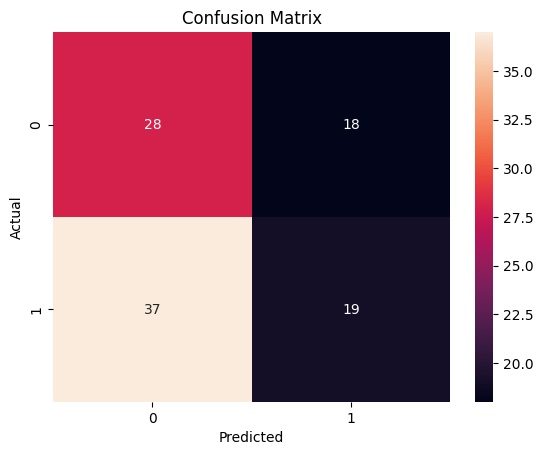

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
new_patient = {
    'date': 738881, # Example ordinal date (corresponds to 2024-01-01)
    'price': 75.0,
    'percentChange': 1.5,
    'change': 1.1
}

In [25]:
import pandas as pd

# Convert to DataFrame
new_df = pd.DataFrame([new_patient])

# Scale with same scaler
new_df_scaled = scaler.transform(new_df)

# Predict
prediction = model.predict(new_df_scaled)

print("Prediction:", "Readmitted" if prediction[0] == 1 else "Not Readmitted")

Prediction: Not Readmitted


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Note: X_test should also be scaled using the same scaler
X_test_scaled = scaler.transform(X_test)